# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats


## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [21]:
from scipy.stats import uniform


**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

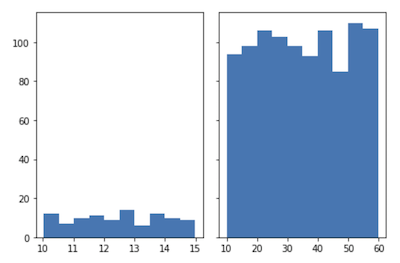

In [25]:
# 1- Create function

def generateUniformNums(bottom, ceiling, count):
    #return np.random.uniform(low=bottom, high=ceiling, size=count)
    return uniform.rvs(loc=bottom, scale=ceiling - bottom, size=count) 
    #Esto se debe a que scipy.stats.uniform considera el rango de valores como [loc,loc+scale]


In [29]:
# 2- Call function
df_1 = generateUniformNums(bottom=10, ceiling=15, count=100)
df_2 = generateUniformNums(bottom=10, ceiling=60, count=1000)
print(df_1)
print(df_2)

[13.86370977 10.95781784 12.75252469 12.80290459 13.61034896 12.76577694
 14.85861647 12.16664156 13.36130187 12.6022439  10.61778395 11.31815117
 11.26512794 11.09756984 13.57241429 13.20073396 13.80650657 14.48781876
 12.40629827 10.92457623 10.92323997 10.80528305 14.19490223 12.79745719
 13.84927672 14.58300428 10.30713037 10.36296605 11.61204054 10.20727109
 11.26301717 11.18751214 12.19235193 12.97081633 12.39232574 12.22415119
 10.50447695 10.47667574 11.59672271 11.59605224 12.06941383 13.14609468
 13.21631921 13.73282835 11.99354417 14.75558269 10.98138953 10.61654633
 12.01000797 11.59182739 10.6140285  11.19108695 14.77438615 10.42161051
 14.81556543 10.37806535 12.4750156  13.99497026 14.9068307  12.85409519
 10.90360437 10.19830924 13.30772405 10.67795175 10.30757569 13.70243569
 10.9582445  12.87646174 11.52487383 14.27707111 14.00585307 12.23931837
 12.13004123 10.60902999 14.72354927 10.79784979 14.71072776 13.29969847
 12.61634318 11.77089305 11.52552788 13.83037551 12

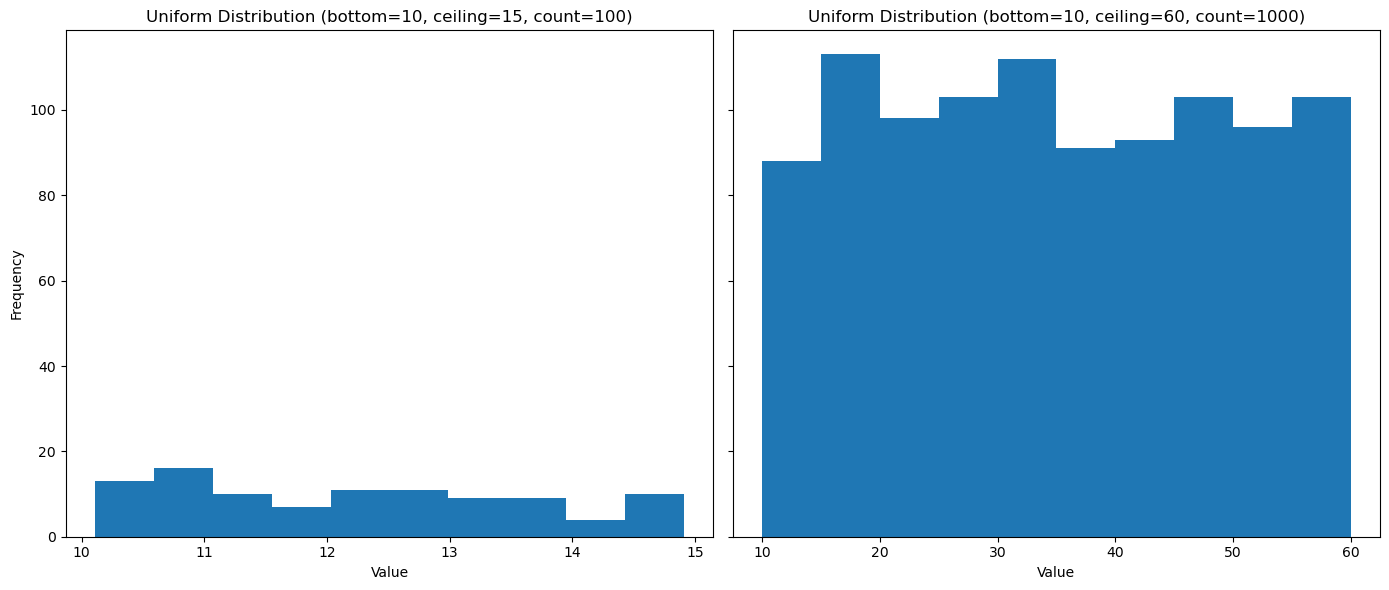

In [30]:
# 3- Show distributions in a histogram plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].hist(df_1, bins=10)
axes[0].set_title("Uniform Distribution (bottom=10, ceiling=15, count=100)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_2, bins=10)
axes[1].set_title("Uniform Distribution (bottom=10, ceiling=60, count=1000)")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()

How are the two distributions different?

Las dos distribuciones difieren en el rango y en el tamaño de la muestra.
La primera distribución tiene un menor intervalo
La segunda distribución al contener mayor número de muestra una distribución más uniforme
 y con menos fluctuación en la altura por cada conjunto.
La primera parece más variable y la segunda más uniforme.


## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

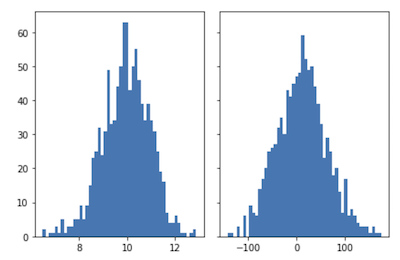

In [35]:
from scipy.stats import norm 

In [41]:
# 1- De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.

def generateNormNums(mean, desv, size):
    """
    Return:
        np.ndarray: Una matriz de números aleatorios
    """
    return norm.rvs(loc=mean, scale=desv, size=size) 

In [42]:
# 2- Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
df_1_norm = generateNormNums(mean=10, desv=1, size=1000)
print(df_1_norm)

[ 9.81089429 11.99843638  9.45013156 11.6109259   8.6466652  10.63833248
  8.00380715 10.84581623  7.82437072  9.73320531  9.78939762  9.72105673
  8.29121552  8.12373521  9.16792903 10.45872244  8.70380147 10.25802149
  8.86035613 10.71794263 12.39129361 11.4618908   9.63475461 10.74944568
  9.77497351 10.02616357  8.52994829 10.83946891  9.1184749  10.09052025
 10.59705415  7.79969061 10.11619233 11.01877053 10.99210622  8.60163033
 10.94229309  9.28727665 11.37460833 11.54258972  9.42757256  8.99809112
 10.25158437 10.24915209 10.41178474  9.2891545  10.47413589 11.79883338
  9.37075756  9.7000872   9.79957937 11.03598535 12.02248885 10.08391568
  8.90538417 12.02508558 10.2074426  10.77230662  9.28623704  9.333433
 11.40964379  9.40711369  9.90510247 10.9678346   9.86723981 10.64253354
  9.63906423  8.61724071  9.1079278  10.19778062 11.47759164 10.86722005
  8.76485379  9.78860349 10.25588814 11.39532252  9.23706555 12.03859021
  9.75203062  7.68472384 11.06003727  9.92125093 10.6

In [ ]:
# 3- Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
df_2_norm = generateNormNums(mean=10, desv=50, size=1000)
print(df_2_norm)

[ 1.59812110e+01 -5.68821919e+01  1.99723036e+01 -2.18224074e+01
  2.39814238e-01 -2.70286776e+01 -4.26212397e+01 -3.06556330e+01
  1.18234109e+02 -2.68137488e+01 -1.47058125e+01  1.59347831e+01
  5.89293490e+01  9.09315382e+01  1.19767841e+01  8.83876726e+01
  2.79826346e+01 -4.71140114e+01 -1.48458500e+01 -4.15317559e+00
 -3.88222708e+01  2.94961186e+01  2.09075036e+01 -3.43553423e+01
  2.09828639e+01  1.29884901e+01  4.92857475e+01 -3.17355391e+01
  3.98256520e+01 -3.09016444e+01 -7.61783157e+01  5.85382264e+00
 -1.00269344e+01  5.16802467e+01  6.29501461e+01  9.35724470e+01
 -1.49600721e+01  5.52403861e+01 -4.65308587e+01 -4.73590955e+01
  1.45680629e+01  1.43530883e+02  4.32270175e+01 -1.71202314e+01
  6.08056539e+01 -2.84263888e+00 -1.07328433e+02 -7.03464900e+01
  3.71945906e+01  8.79102845e+00 -5.95171977e+01 -2.30236447e+01
  1.94827662e+01 -4.75558478e+01  5.19629088e+01 -1.02990510e+01
 -2.68639607e+01  2.42235599e+01  3.35193827e+01  3.33366761e+01
 -1.22751336e+02  2.05867

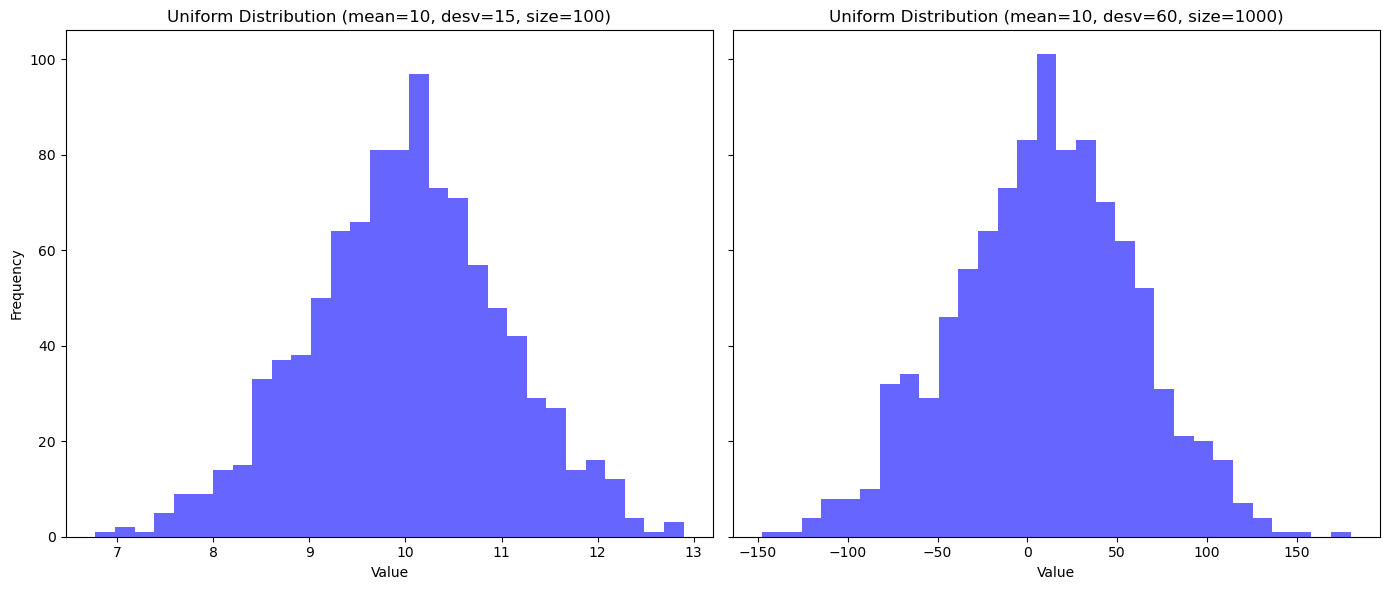

In [57]:
# 3- Representa gráficamente las distribuciones de los datos generados.
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].hist(df_1_norm, bins=30, alpha=0.6, color='blue')
axes[0].set_title("Uniform Distribution (mean=10, desv=15, size=100)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_2_norm, bins=30, alpha=0.6, color='blue')
axes[1].set_title("Uniform Distribution (mean=10, desv=60, size=1000)")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()

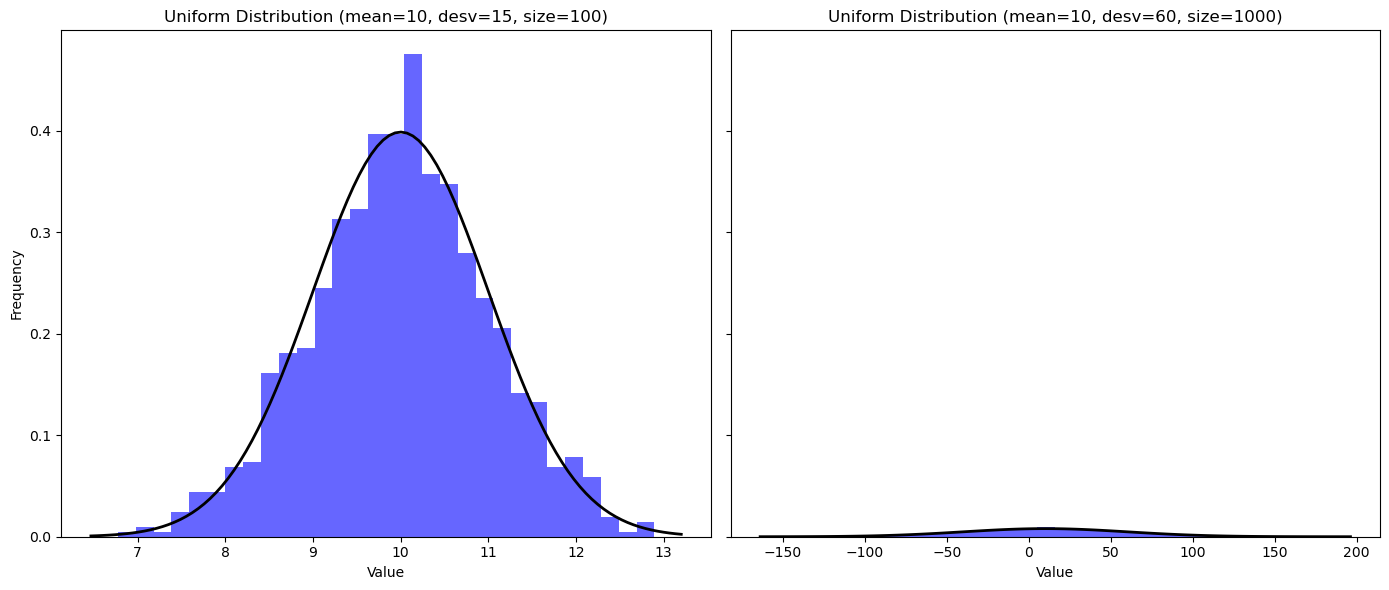

In [55]:
# 3- Representa gráficamente las distribuciones de los datos generados y líneas densidad.
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].hist(df_1_norm, bins=30, density=True, alpha=0.6, color='blue')
xmin1, xmax1 = axes[0].get_xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, loc=10, scale=1)  # Densidad de la primera distribución
axes[0].plot(x1, p1, 'k', linewidth=2)  # Línea de densidad
axes[0].set_title("Uniform Distribution (mean=10, desv=15, size=100)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_2_norm, bins=30, density=True, alpha=0.6, color='blue')
xmin2, xmax2 = axes[1].get_xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, loc=10, scale=50) 
axes[1].plot(x2, p2, 'k', linewidth=2)
axes[1].set_title("Uniform Distribution (mean=10, desv=60, size=1000)")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()

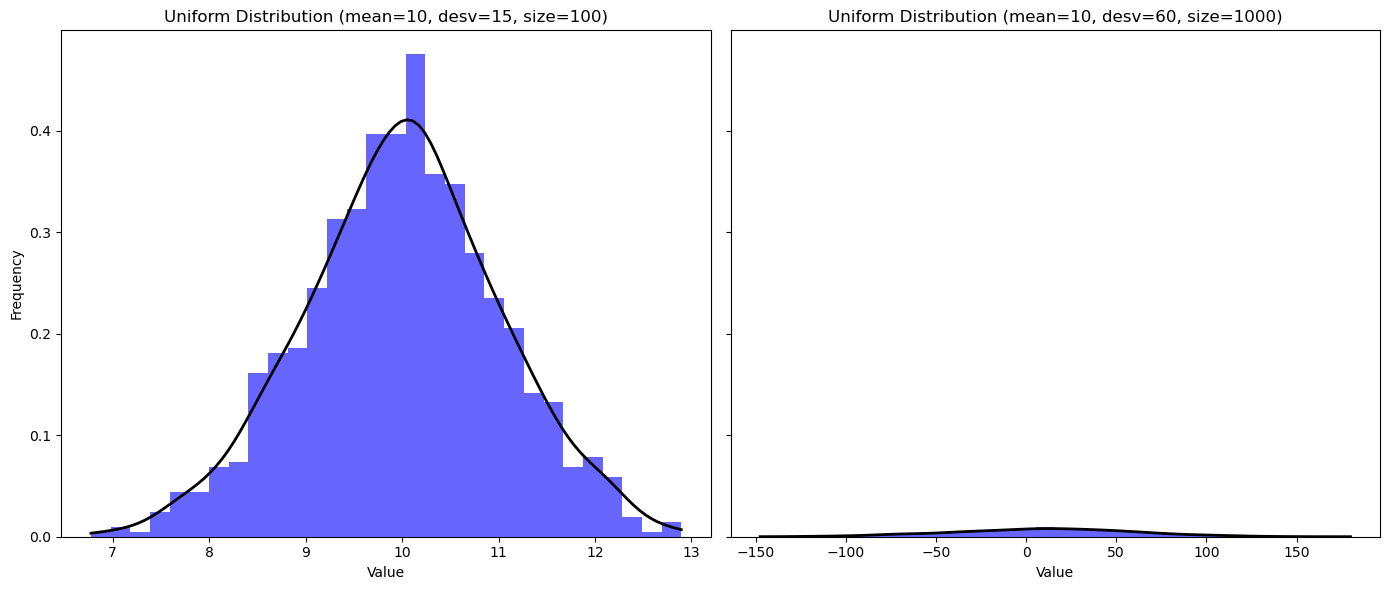

In [54]:

# 3- Representa gráficamente las distribuciones de los datos generados.
# usando kde
from scipy.stats import gaussian_kde

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].hist(df_1_norm, bins=30, density=True, alpha=0.6, color='blue')
kde1 = gaussian_kde(df_1_norm)  # Estimador de densidad
x1 = np.linspace(min(df_1_norm), max(df_1_norm), 100)
axes[0].plot(x1, kde1(x1), 'k', linewidth=2)  # Línea de densidad
axes[0].set_title("Uniform Distribution (mean=10, desv=15, size=100)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_2_norm, bins=30, density=True, alpha=0.6, color='blue')
kde2 = gaussian_kde(df_2_norm)  # Estimador de densidad
x2 = np.linspace(min(df_2_norm), max(df_2_norm), 100)
axes[1].plot(x2, kde2(x2), 'k', linewidth=2)
axes[1].set_title("Uniform Distribution (mean=10, desv=60, size=1000)")
axes[1].set_xlabel("Value")

plt.tight_layout()
plt.show()


How are the two distributions different?

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [63]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [66]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

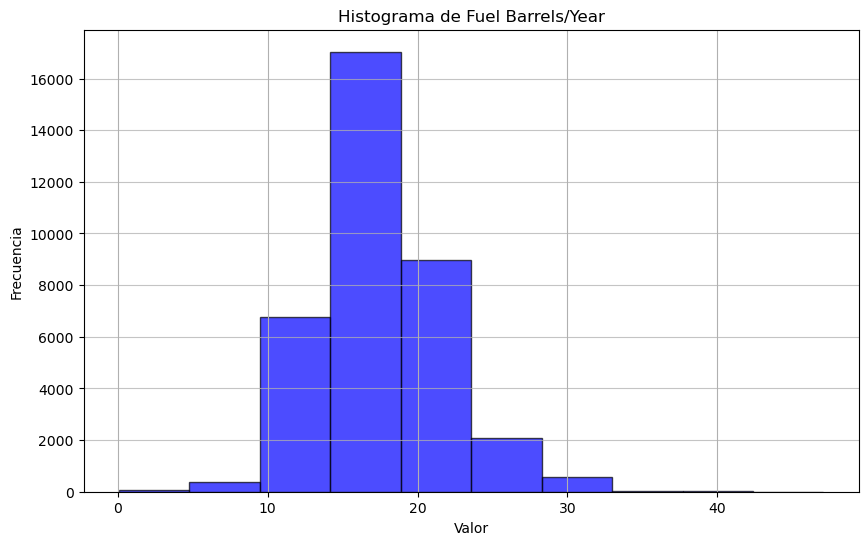

In [86]:
plt.figure(figsize=(10, 6))
vehicles['Fuel Barrels/Year'].hist(alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de Fuel Barrels/Year')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

2. Emisiones de CO2 Gramos/Milla 

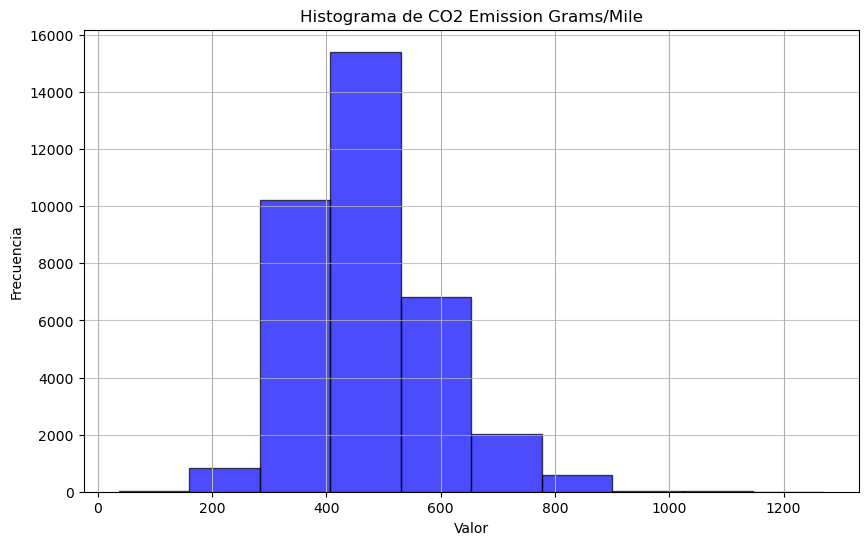

In [85]:
plt.figure(figsize=(10, 6))
vehicles['CO2 Emission Grams/Mile'].hist(alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de CO2 Emission Grams/Mile')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

3. MPG combinado

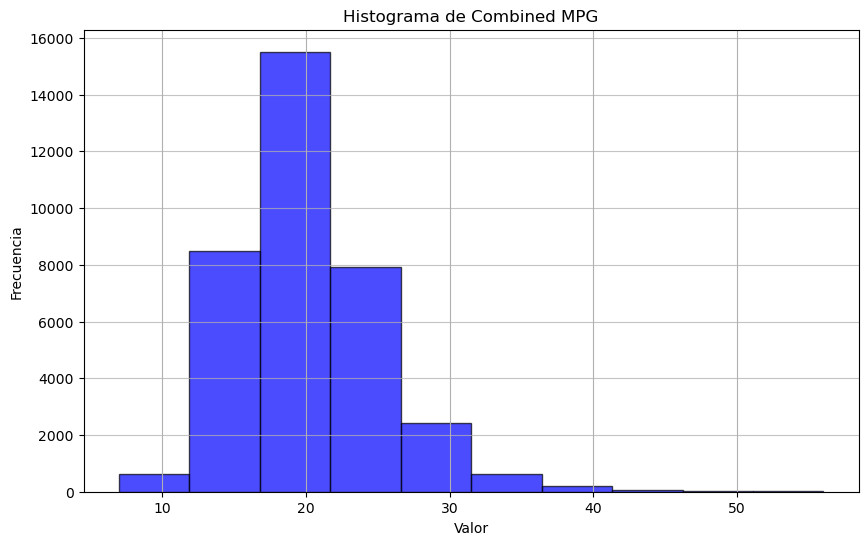

In [84]:
plt.figure(figsize=(10, 6))
vehicles['Combined MPG'].hist(alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de Combined MPG')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

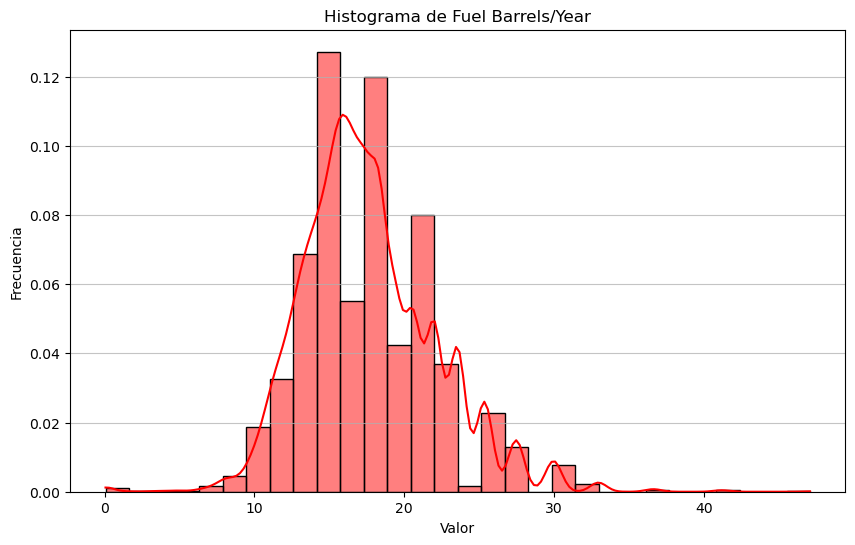

In [83]:
plt.figure(figsize=(10, 6))
#vehicles['Fuel Barrels/Year'].hist(alpha=0.7, color='blue', edgecolor='black')
sns.histplot(vehicles['Fuel Barrels/Year'], kde=True, stat='density', bins=30, color='red', label='Fuel Barrels/Year', alpha=0.5)
plt.title('Histograma de Fuel Barrels/Year')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

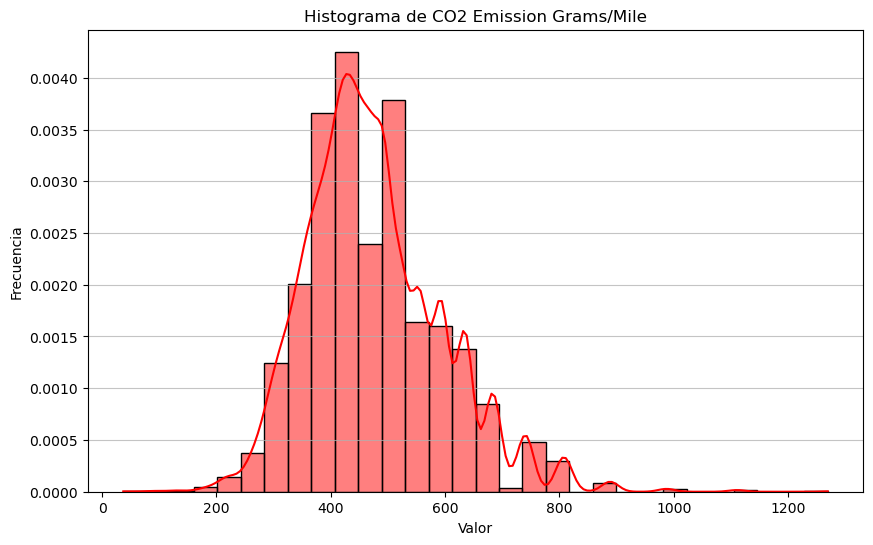

In [82]:
plt.figure(figsize=(10, 6))
#vehicles['CO2 Emission Grams/Mile'].hist(alpha=0.7, color='blue', edgecolor='black')
sns.histplot(vehicles['CO2 Emission Grams/Mile'], kde=True, stat='density', bins=30, color='red', label='CO2 Emission Grams/Mile', alpha=0.5)
plt.title('Histograma de CO2 Emission Grams/Mile')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

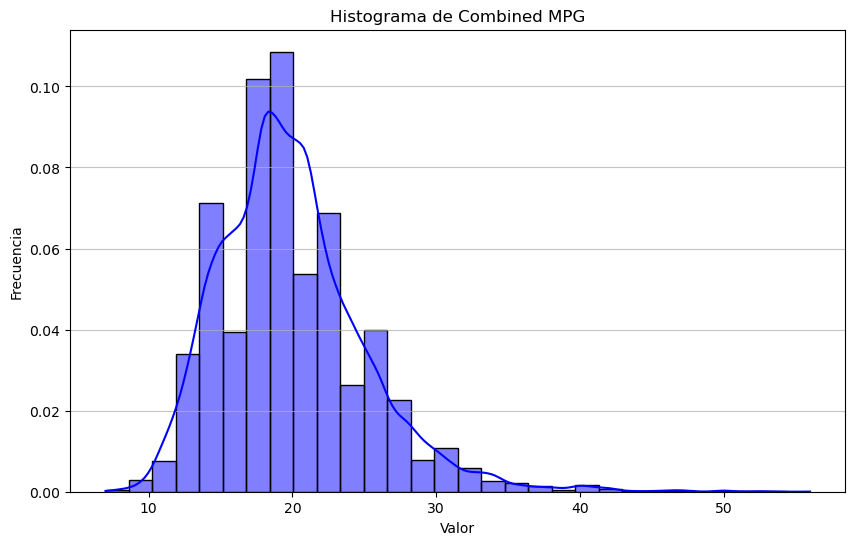

In [81]:
plt.figure(figsize=(10, 6))
#vehicles['Combined MPG'].hist(alpha=0.7, color='blue', edgecolor='black')
sns.histplot(vehicles['Combined MPG'], kde=True, stat='density', bins=30, color='blue', label='Combined MPG')
plt.title('Histograma de Combined MPG')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ninguno de ellos está normalmente ditribuido. 

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

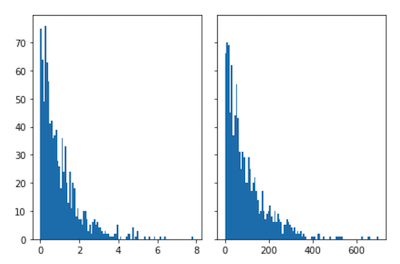

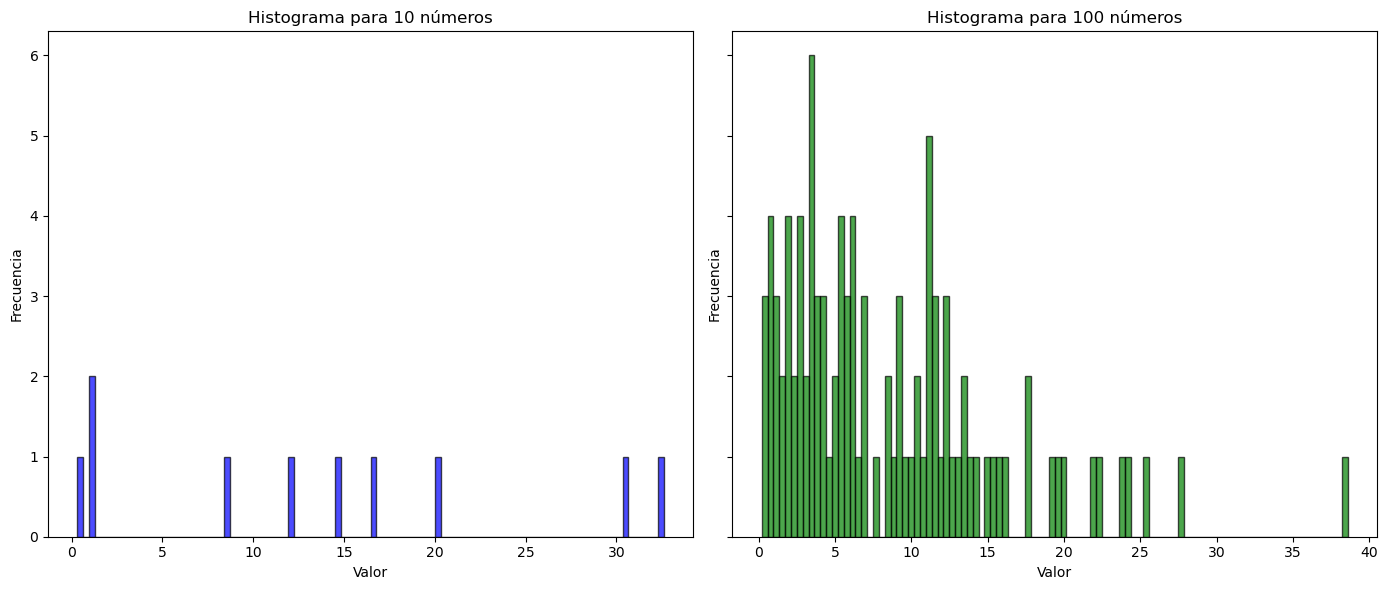

In [11]:
# Función genera números distribuidos exponencialmente con la media de 10
def generateExponentialNums(mean, size):
    scale = mean  # La media de una distribución exponencial es igual al parámetro scale
    return np.random.exponential(scale = scale, size = size)

# Generamos las dos secuencias de números
data_10 = generateExponentialNums(10, 10)
data_100 = generateExponentialNums(10, 100)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histograma para la secuencia de tamaño 10 y primer subplot
plt.subplot(1, 2, 1)
plt.hist(data_10, bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma para 10 números')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para la secuencia de tamaño 100 y segundo subplot
plt.subplot(1, 2, 2)
plt.hist(data_100, bins=100, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma para 100 números')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


¿En qué se diferencian ambas distribuciones?

La media cambia, por lo que la distribución también cambia. 

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [ ]:
from scipy.stats import expon

mean = 10
λ = 1/10 # prob de eventos por tiempo, 1 / media de los datos
threshold = 15

prob_less_15 = expon.cdf(threshold, scale=mean)
prob_less_15


0.7768698398515702

In [18]:
# Hint: This is same as saying P(x<15)
print(f"La probabilidad de que el cliente pase menos de 15 minutos es de: {prob_less_15:.2f}")

La probabilidad de que el cliente pase menos de 15 minutos es de: 0.78


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [19]:
# Complemento de la prob: P(x>15) = 1 - P(x<15) 
prob_more_15 = 1 - prob_less_15

print(f"La probabilidad de que el cliente pase más de 15 minutos es de {prob_more_15:.2f}")

La probabilidad de que el cliente pase más de 15 minutos es de 0.22
